<a href="https://colab.research.google.com/github/silmatripathy23/casestudy_YULU_hypothesis_testing/blob/main/YULU_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency




# **Problem Defination**

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions.

 We have been given a dataset of the Count of rental bikes of Yulu along with datetime, atmospheric condition, and day type. We have to analyze attributes affecting the company's revenue and give feedback on conditions affecting it.

In [ ]:
#Importing the dataset
!gdown https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i -O yulu.csv


Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 29.6MB/s]


In [ ]:
data = pd.read_csv('yulu.csv')

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**

In [ ]:
#shape of the data frame
data.shape

(10886, 12)

In the data frame, we have 10886 number od rows and 12 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In the data frame, there is only one column having String data type.
There are below 3 columns having float data type.

 1. temp
 2. atemp
 3. windspeed

All the other attributes having numerical in nature.


The column 'datetime' should be datetime type instead of String.

 The columns like 'season','holiday', 'workingday', 'weather' should be category type instead of int64

In [ ]:
#Changing the datatype of the attribues
data['datetime'] = pd.to_datetime(data['datetime'])
data[['season','holiday', 'workingday', 'weather']] = data[['season','holiday', 'workingday', 'weather']].astype('category')

#After changing the datatype of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
#Checking number of unique value for each attribute
data.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
#Checking missing value percentage for each attribute in data frame
(data.isnull().sum()) * 100 / data.shape[0]

,0
datetime,0.0
season,0.0
holiday,0.0
workingday,0.0
weather,0.0
temp,0.0
atemp,0.0
humidity,0.0
windspeed,0.0
casual,0.0


There is no missing value for any of the columns.

In [ ]:
#checking for duplicate rows
dup_rows = data.duplicated().sum()
print("Number of duplicate row:", dup_rows)

Number of duplicate row: 0


In [ ]:
#Stastical analysis of numerical attaribute
data.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
#Stastical analysis of  object
data.describe(include="category")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


# **Univariate Analysis**

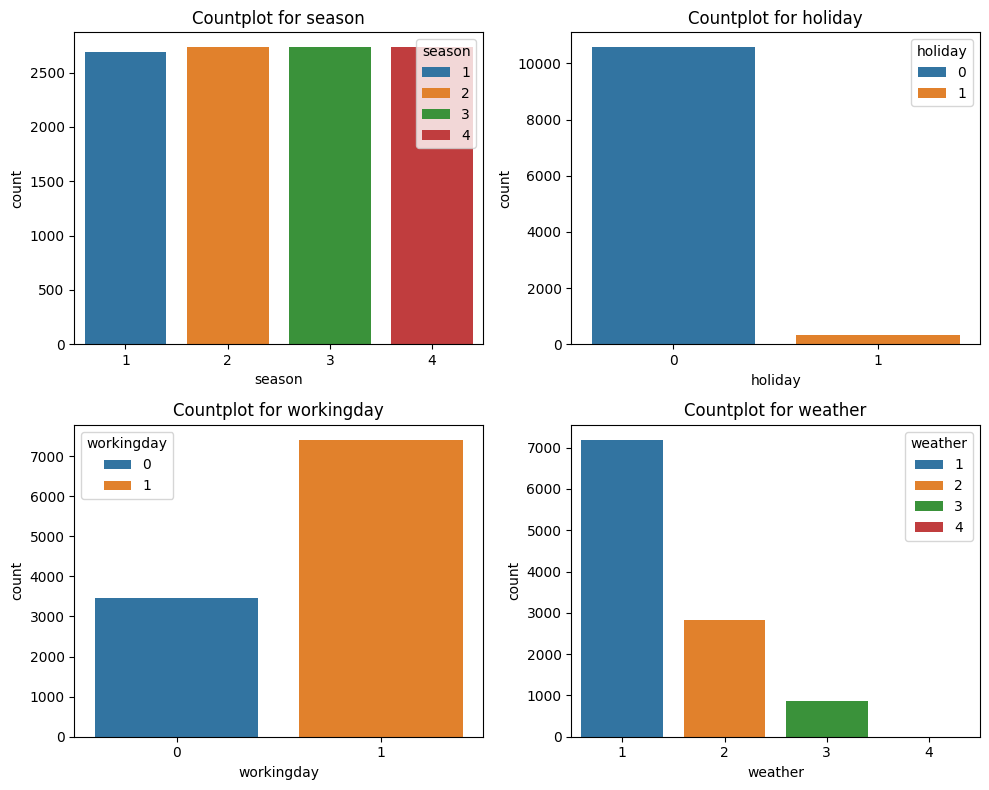

In [ ]:
# Plot countplots for categorical columns in a single frame
cat_columns = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(cat_columns):
    row = i // 2
    col_num = i % 2
    sns.countplot(x=col, data=data, ax=axes[row, col_num], hue = col)
    axes[row, col_num].set_title(f'Countplot for {col}')

plt.tight_layout()
plt.show()

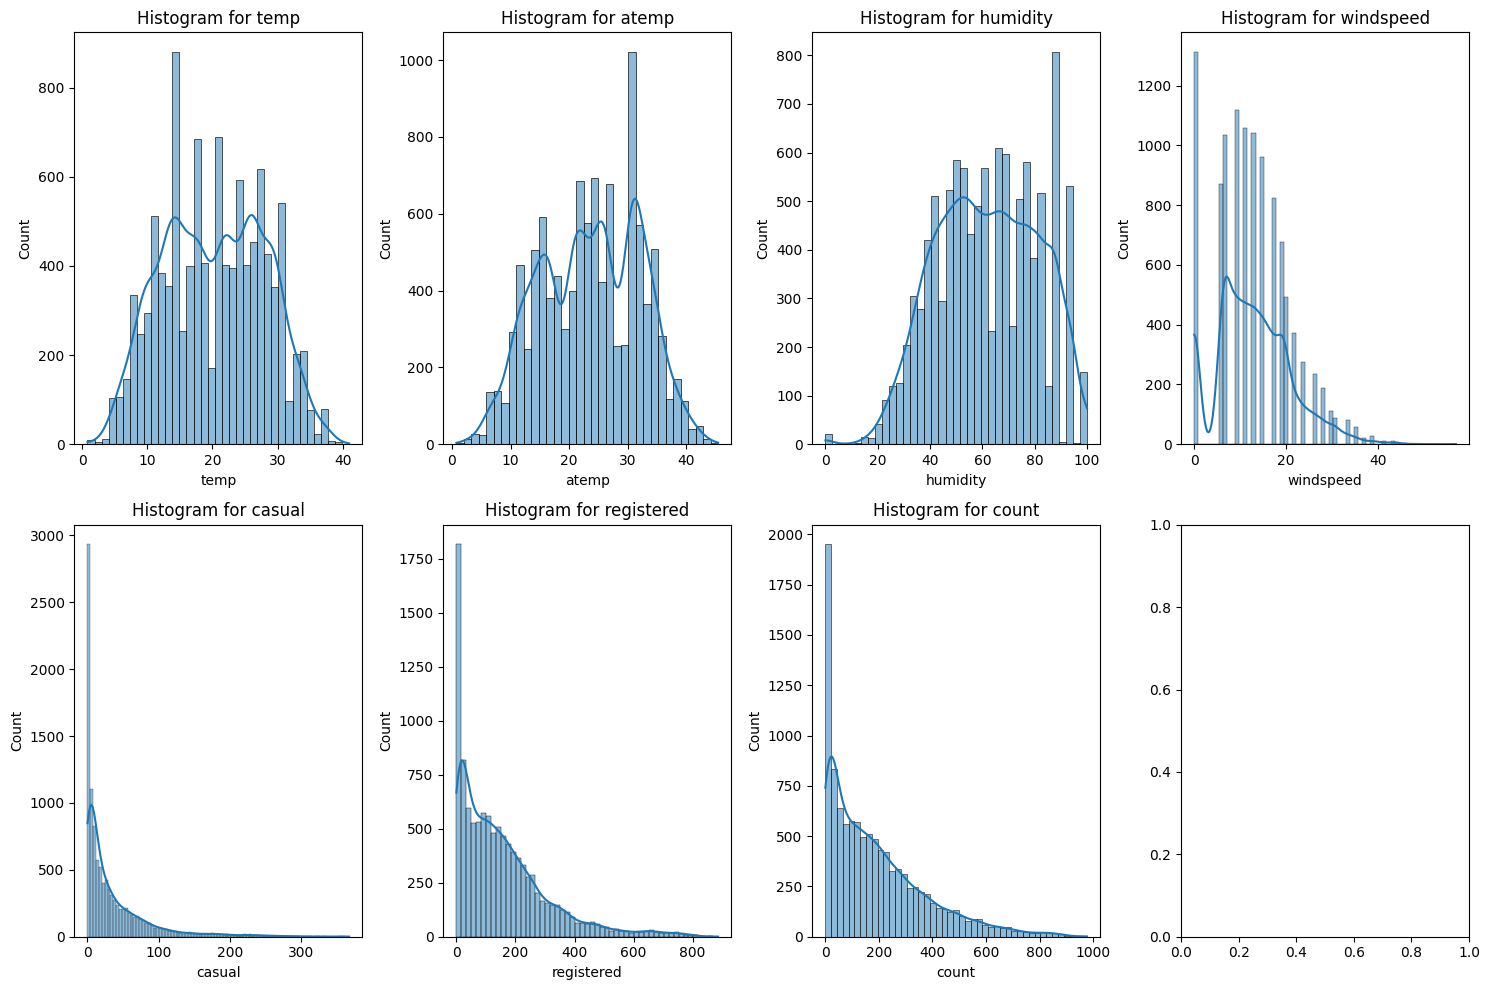

In [ ]:
# Plot histogram for numerical columns in a single frame
num_columns = ['temp', 'atemp', 'humidity', 'windspeed','casual', 'registered' , 'count']
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, col in enumerate(num_columns):
    row = i // 4
    col_num = i % 4
    sns.histplot(x=col, data=data, ax=axes[row, col_num], kde = True)
    axes[row, col_num].set_title(f'Histogram for {col}')

plt.tight_layout()
plt.show()


### **Check for Outliers**

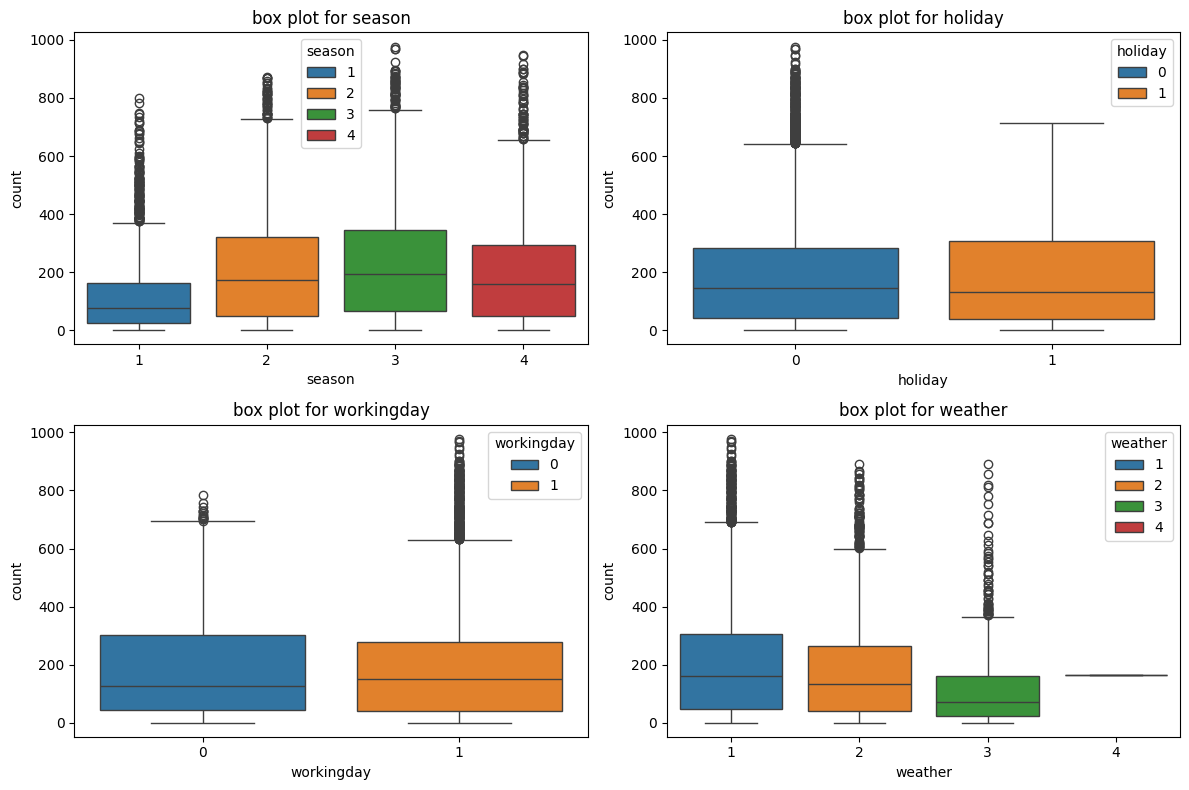

In [ ]:
#Checking outliers for categorical columns using box plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(cat_columns):
    row = i // 2
    col_num = i % 2
    sns.boxplot(x = col, y = 'count', data = data,ax=axes[row, col_num], hue = col )
    axes[row, col_num].set_title(f'box plot for {col}')

plt.tight_layout()
plt.show()


<ipython-input-66-d13dce376a4b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['count'], bins = 10)


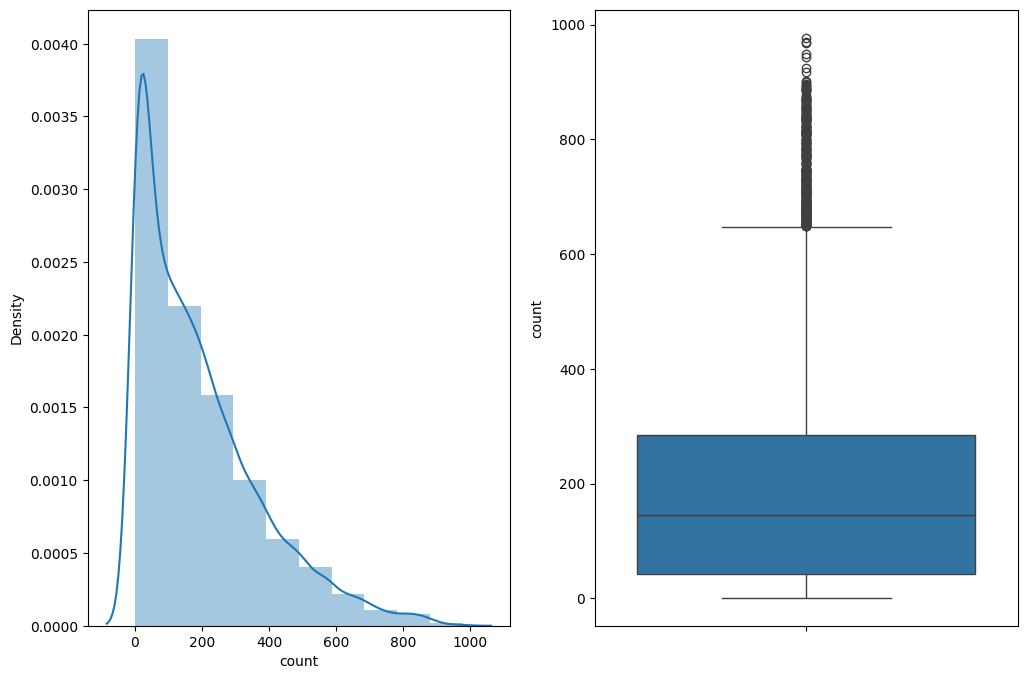

In [ ]:
#checking distribution of 'count' column
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.distplot(data['count'], bins = 10)

plt.subplot(1,2,2)
sns.boxplot(y = data['count'])
plt.show()


<ipython-input-67-e38ea0da4efc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['count']), bins = 10)


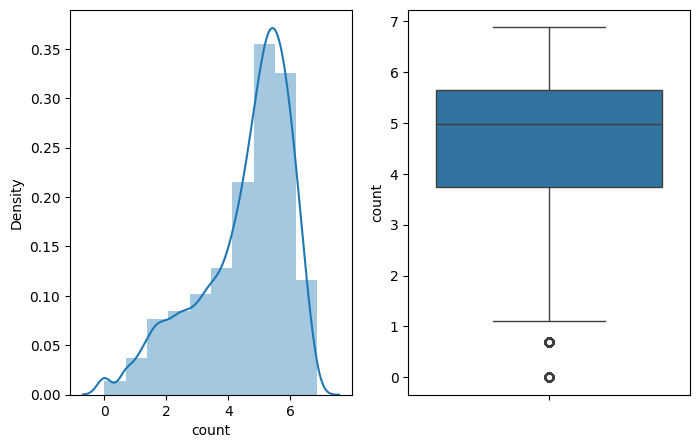

In [ ]:
#checking the distribution of 'count' column after log transformation
plt.figure(figsize = (8,5))

#histogram
plt.subplot(1,2,1)
sns.distplot(np.log(data['count']), bins = 10)

#barplot
plt.subplot(1,2,2)
sns.boxplot(y = np.log(data['count']))

plt.show()

## **BIVARIATE ANALYSIS**

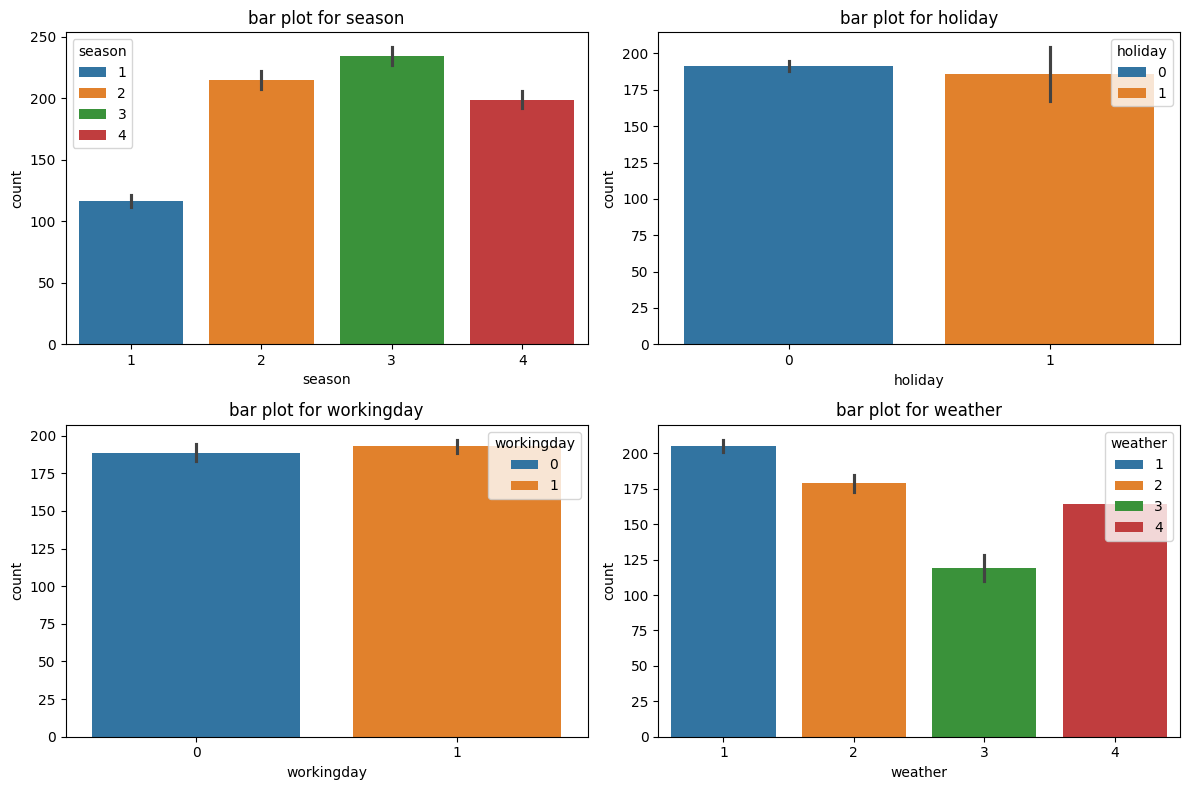

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(cat_columns):
    row = i // 2
    col_num = i % 2
    sns.barplot(x = col, y = 'count', data = data,ax=axes[row, col_num], hue = col )
    axes[row, col_num].set_title(f'bar plot for {col}')

plt.tight_layout()
plt.show()


## **Relationship between the Dependent and Independent Variables.**

In [ ]:
#keep the copy of the original data frame into data_original

data_original = data.copy()
data_original.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


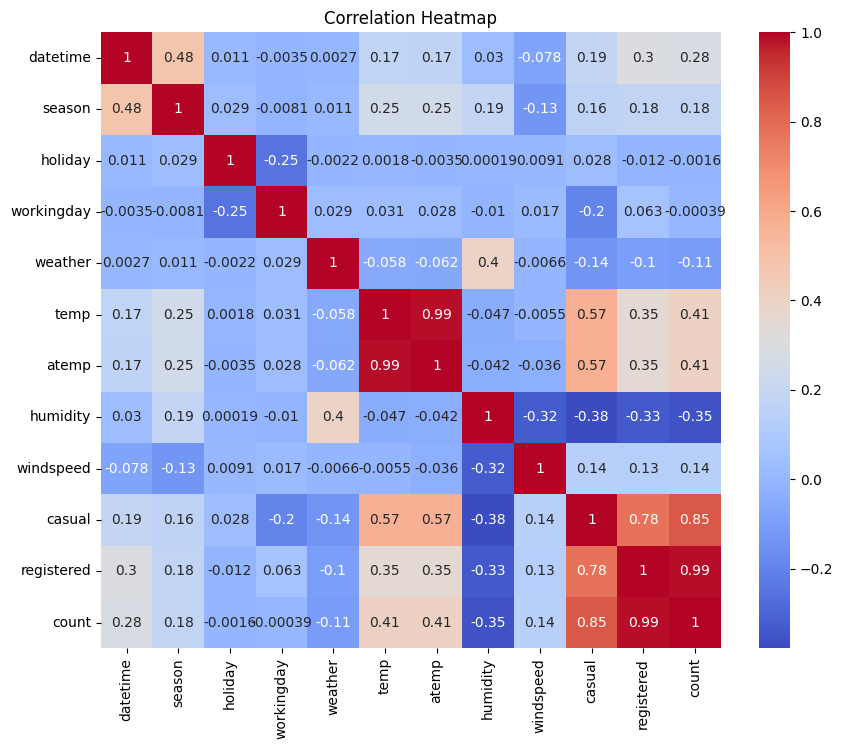

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(method = 'spearman'), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The actual temperature(temp column) and feeling temperature(atemp column) are highly correlated. So we can drop the column 'atemp'.

 The 'registered' and 'casual' columns are  highly correlated with 'count' column. So we can drop 'registered' and 'casual' columns.

In [ ]:
#dropping the columns 'atemp', 'registered'and'casual' .

data = data.drop(['atemp', 'registered','casual'], axis = 1)
data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1


# **HYPOTHESIS TESTING**

**Aggregating total number of bikes based on below category.**

In [ ]:
#Aggregating based on 'working day'
data.groupby('workingday')['count'].describe()

<ipython-input-72-6364707eb24e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('workingday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
#Aggregating based on 'Holiday'
data.groupby('holiday')['count'].describe()

<ipython-input-73-b8797f3ea0ae>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('holiday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [ ]:
#Aggregation based on 'season'
data.groupby('season')['count'].describe()

<ipython-input-74-29a57cb7d4d0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('season')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
#Aggregation based on 'weather'
data.groupby('weather')['count'].describe()

<ipython-input-75-77b5a755703c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('weather')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


## **Q1 Check Working Day has an effect on the number of electric cycles rented ****

**Is there any significant difference between working day and non-working (weekends)that are affecting the count of electric bikes rented.**



**Step- 1**

Assigning null hypethesis and alternate hypothesis

  Null Hypothesis(H0): The number of electric bikes rented on working days are greater than or equal to the number of electric bikes rented on weekends.

  Alternate Hypothesis(H1): The number of electric bikes rented on working days are lesser than to the number of electric bikes rented on weekends.

  mu1 : Average number of bikes rented on working days.

   mu2 : Average number of bikes rented on weekends.

H0 = mu1 >= mu2
,    H1 = mu1 < mu2


**Step -2**

 Choosing appropiate test.

 As there is no population standard deviation ig given, we will choose t- test instead of z-test.



In [ ]:
#collecting samples from whole data set
workingdays = data[data['workingday']== 1]['count'].sample(2000)
weekends = data[data['workingday']== 0]['count'].sample(2000)
print(workingdays.shape)
print(weekends.shape)

(2000,)
(2000,)


In [ ]:
#calculating sample standard deviation of the two samples workingdays and weekends
print("The sample standard deviation for workingdays is :", round(workingdays.std(), 2))
print("The sample standard deviation for weekends is :", round(weekends.std(), 2))


The sample standard deviation for workingdays is : 185.9
The sample standard deviation for weekends is : 172.29


As the sample standard deviation for both workingdays and weekends are different, we can assume that population standard deviation will also be different.

 As it is one tailed test and we are taking two independent groups, so the appropiate test for this hypothesis is **2- sample independent t-test**.

**Step- 3**

 Decide significance level

In [ ]:
#Assigning singificance value
alpha = 0.05

**Step- 4**

 Calculate p-value

In [ ]:
def results(p_value, alpha):
  if p_value < alpha:
    print(f"As the p_value {p_value} is less than aplha, we reject the null hypothesis")
    print("The number of electric bikes rented on working days are significantly less  to the number of electric bikes rented on weekends.")
  else:
    print(f"As the p_value {p_value} is greater than aplha, we fail to reject the null hypothesis")
    print("The number of electric bikes rented on working days are significantly greater than or equal to the number of electric bikes rented on weekends.")

In [ ]:
test_stats , p_value = ttest_ind(workingdays, weekends ,alternative = 'less')
print("The test statistics is :", test_stats)
print("p_value is :", p_value)
results(p_value, alpha)

The test statistics is : 0.8295347484722321
p_value is : 0.7965742960045634
As the p_value 0.7965742960045634 is greater than aplha, we fail to reject the null hypothesis
The number of electric bikes rented on working days are significantly greater than or equal to the number of electric bikes rented on weekends.


**Q2 Is there any significant difference between working day(weekdays) and holidays that are affecting the count of electric bikes rented.**

**Step- 1**

Assigning null hypethesis and alternate hypothesis

  Null Hypothesis(H0): The number of electric bikes rented on weekdays are greater than or equal to the number of electric bikes rented on holidays.

  Alternate Hypothesis(H1): The number of electric bikes rented on weekdays are lesser than to the number of electric bikes rented on holidays.

  mu1 : Average number of bikes rented on weekdays.

   mu2 : Average number of bikes rented on holidays.

H0 = mu1 >= mu2
,    H1 = mu1 < mu2


**Step -2**

 Choosing appropiate test.

 As there is no population standard deviation is given, we will choose t- test instead of z-test.



In [ ]:
#collecting samples from whole data set
weekdays = data[data['holiday']== 0]['count'].sample(200)
holidays = data[data['holiday']== 1]['count'].sample(200)
print(weekdays.shape)
print(holidays.shape)

(200,)
(200,)


In [ ]:
#calculating sample standard deviation of the two samples workingdays and weekends
print("The sample standard deviation for workingdays is :", round(weekdays.std(), 2))
print("The sample standard deviation for holidays is :", round(holidays.std(), 2))


The sample standard deviation for workingdays is : 179.56
The sample standard deviation for holidays is : 169.84


As the sample standard deviation for both workingdays and holidays are different, we can assume that population standard deviation will also be different.

As it is one tailed test and we are taking two independent groups, so the appropiate test for this hypothesis is 2- sample independent t-test.

**Step- 3**

Decide significance level

In [ ]:
#Assigning singificance value
alpha = 0.05

**Step- 4**

Calculate p-value



In [ ]:
def results(p_value, alpha):
  if p_value < alpha:
    print(f"As the p_value {p_value} is less than aplha, we reject the null hypothesis")
    print("The number of electric bikes rented on working days are significantly less  to the number of electric bikes rented on holidays.")
  else:
    print(f"As the p_value {p_value} is greater than aplha, we fail to reject the null hypothesis")
    print("The number of electric bikes rented on working days are significantly greater than or equal to the number of electric bikes rented on holidays.")

In [ ]:
test_stats , p_value = ttest_ind(weekdays, holidays ,alternative = 'less')
print("The test statistics is :", test_stats)
print("p_value is :", p_value)
results(p_value, alpha)

The test statistics is : 0.3590514561177275
p_value is : 0.6401265013623931
As the p_value 0.6401265013623931 is greater than aplha, we fail to reject the null hypothesis
The number of electric bikes rented on working days are significantly greater than or equal to the number of electric bikes rented on holidays.


# ***No. of cycles rented is similar or different in different 1. weather 2. season ***

**Is the number of bike rented similar or different in different weather**

**Step- 1**

Assigning null hypethesis and alternate hypothesis

  Null Hypothesis(H0): The average number of electric bikes rented on different weather is same.

  Alternate Hypothesis(H1): The average number of electric bikes rented on different weather is different.



In [ ]:
data[data['weather']==4]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,86,6.0032,164


**Step 2**

Choosing appropiate test

In [ ]:
w1 = data[data['weather'] == 1]['count'].sample(800)
w2 = data[data['weather'] == 2]['count'].sample(800)
w3 = data[data['weather'] == 3]['count'].sample(800)
print(w1.shape)
print(w2.shape)
print(w3.shape)

(800,)
(800,)
(800,)


As there are more than two groups for analysis, t test will take more time and gives us more error rate.

 One-way Anove test could be better appropiate test here provided normality and equality of varience has already verified.

 The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.


1.  The samples are independent.
2.  Each sample is from a normally distributed population.
3.  The population variance of the groups are all equal.

As we are taking 3 independent groups , then no need to test for independecy

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.



### **Step 3**

Decide the significance level.

In [ ]:
alph = 0.05
print(alpha)

0.05


 **Step 4**

Calculate P_value

In [ ]:
def results(p_value, alpha):
  if p_value < alpha:
    print(f"As the p_value {p_value} is less than aplha, we reject the null hypothesis")
    print("The average number of electric bikes rented on different weather is different")
  else:
    print(f"As the p_value {p_value} is greater than aplha, we fail to reject the null hypothesis")
    print("The average number of electric bikes rented on different weather is same")

In [ ]:
stats_value , p_value = f_oneway(w1,w2,w3)
print("The p_value is :", p_value)
results(p_value, alpha)

The p_value is : 1.065804825685957e-28
As the p_value 1.065804825685957e-28 is less than aplha, we reject the null hypothesis
The average number of electric bikes rented on different weather is different


### **Is the number of bike rented similar or different in different seasons**

**Step 1**

Assigning null hypethesis and alternate hypothesis

Null Hypothesis(H0): The average number of electric bikes rented on different seasons is same.

Alternate Hypothesis(H1): The average number of electric bikes rented on different seasons is different.

**Step 2**

Choosing appropiate test

In [ ]:
s1 = data[data['season'] == 1]['count'].sample(2500)
s2 = data[data['season'] == 2]['count'].sample(2500)
s3 = data[data['season'] == 3]['count'].sample(2500)
s4 = data[data['season'] == 4]['count'].sample(2500)
print(s1.shape)
print(s2.shape)
print(s3.shape)
print(s4.shape)

(2500,)
(2500,)
(2500,)
(2500,)


**Step 3**

Decide the significance level.

In [ ]:
alph = 0.05
print(alpha)

0.05


 **Step 4**

Calculate P_value

In [ ]:
def results(p_value, alpha):
  if p_value < alpha:
    print(f"As the p_value {p_value} is less than aplha, we reject the null hypothesis")
    print("The average number of electric bikes rented on different seasons is different")
  else:
    print(f"As the p_value {p_value} is greater than aplha, we fail to reject the null hypothesis")
    print("The average number of electric bikes rented on different seasons is same")

In [ ]:
stats_value , p_value = f_oneway(s1,s2,s3,s4)
print("The p_value is :", p_value)
results(p_value, alpha)

The p_value is : 3.194049831660411e-141
As the p_value 3.194049831660411e-141 is less than aplha, we reject the null hypothesis
The average number of electric bikes rented on different seasons is different


### **Are the weather conditions significantly depend on different seasons?**

**Step 1**

Assigning null hypethesis and alternate hypothesis

Null Hypothesis(H0): The  weather conditions significantly independent ot the seasons.

Alternate Hypothesis(H1): The  weather conditions significantly depend upon the seasons..

**Step 2**

Choosing appropiate test

Both the columns 'weather' and 'season' are categorical columns. So we prefer 	Chi-square test to check  weather is dependent on the season.

In [ ]:
dict1 = {1: 'Sunny',
         2: 'Cloudy',
         3: 'Rainy'}
data['weather_enc'] = data['weather'].map(dict1)

dict2 = {1: 'Spring',
         2: 'Summer',
         3: 'Rainy',
         4: 'Winter'}
data['season_enc'] = data['season'].map(dict2)

data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,weather_enc,season_enc
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,Sunny,Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,Sunny,Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,Sunny,Spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,Sunny,Spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,Sunny,Spring


In [ ]:
contigency= pd.crosstab(data.season_enc, data.weather_enc)
contigency

weather_enc,Cloudy,Rainy,Sunny
season_enc,,,
Spring,715,211,1759
Summer,708,224,1801
Rainy,604,199,1930
Winter,807,225,1702


**Step 3**

Decide the significance level.

In [ ]:
alph = 0.05
print(alpha)

0.05


 **Step 4**

Calculate P_value

In [ ]:
def results(p_value, alpha):
  if p_value < alpha:
    print(f"As the p_value {p_value} is less than aplha, we reject the null hypothesis")
    print("The weather conditions significantly depend upon the seasons..")
  else:
    print(f"As the p_value {p_value} is greater than aplha, we fail to reject the null hypothesis")
    print("The weather conditions significantly independent ot the seasons")

In [ ]:
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction=False)
print('Chi-square Statistic: {} \n P-value: {} \n Degree of Freedom: {} \n Expected Frequencies: {}'.format(chi2, pval, dof, exp_freq))


Chi-square Statistic: 46.1014573107325 
 P-value: 2.826001450992924e-08 
 Degree of Freedom: 6 
 Expected Frequencies: [[ 699.06201194  211.8892972  1774.04869086]
 [ 711.55920992  215.67726229 1805.76352779]
 [ 711.55920992  215.67726229 1805.76352779]
 [ 711.81956821  215.75617823 1806.42425356]]


In [ ]:
results(p_value, alpha)

As the p_value 3.194049831660411e-141 is less than aplha, we reject the null hypothesis
The weather conditions significantly depend upon the seasons..


# **Business Insights**

* We have 10886 number of records preseent in dataset.
* There is no missing value or duplicated value for any of columns in dataset.
*The actual temperature(temp column) and feeling temperature(atemp column) are highly correlated. So we can drop the column 'atemp'.
*The 'registered' and 'casual' columns are  highly correlated with 'count' column. So we can drop 'registered' and 'casual' columns.
* The number of electric bikes rented on working days are significantly higher than weekends.
* The number of electric bikes on rented on working days are comparatively higher than on holidays
* The  number of electric bikes on rented are different in differnt weather.
* The  number of electric bikes on rented are different in seasons.
* The weather conditions and the seasons are dependent on eachother in different seasons.


# **Recomendation:**

* During spring, Yulu should provide some discounts and offers to increase the use of rental bikes.

* During weather of rain, The mean of total rental bikes is lower than others. As Yulu provides bike services, customers can't use it in rainy times. so Yulu should provide some roofs or cab services during this weather.

* As humidity increases the total number of rental bikes decreases, so, Yulu should provide benefits during these humid days.

* Yulu can increase the use of rental bikes by providing some city tour offers, events, or campaigns during non-working days.

* Yulu can convert its casual users to registered users by providing some discounts or registration offers to convert casual users to registered users.

* As mostly there is clear weather, Yulu should focus on the increase in total rental bikes during clear weather days.

